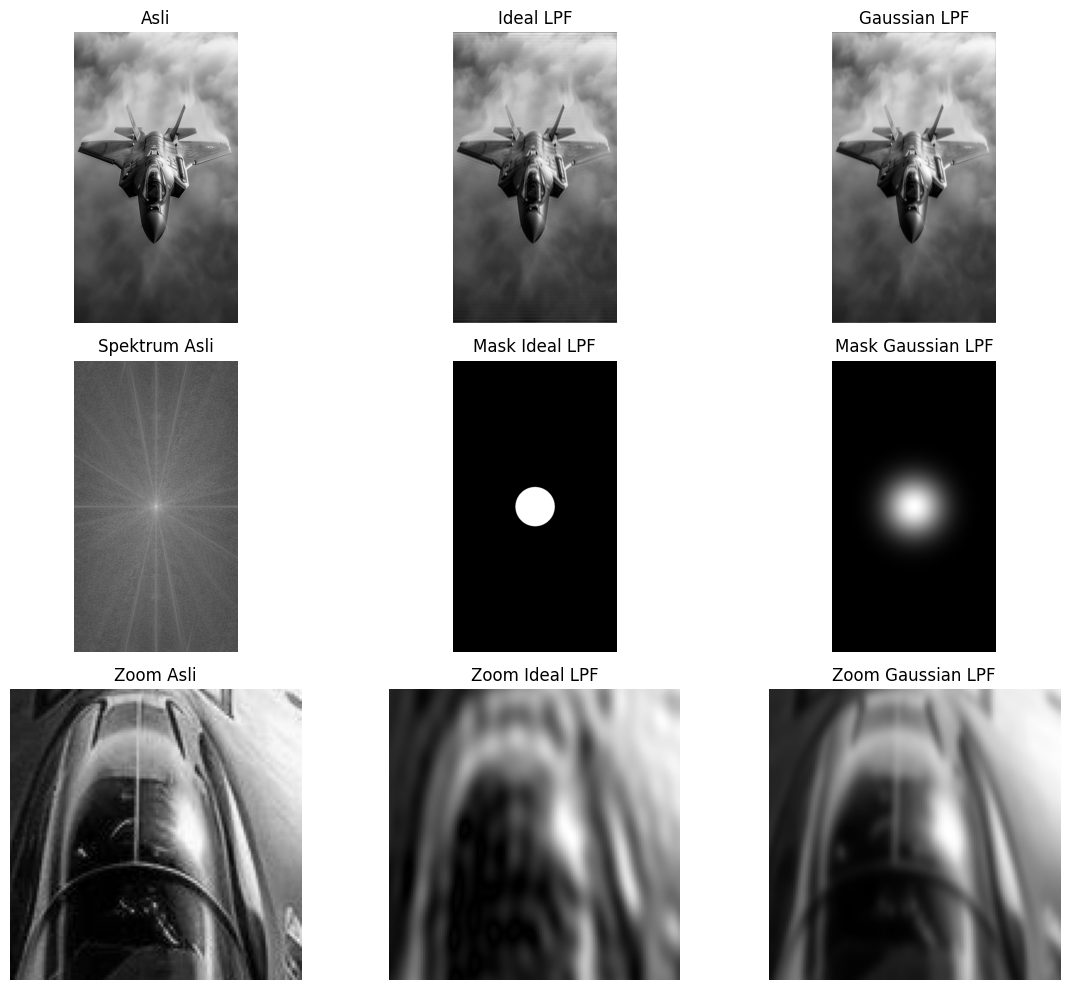

Ubah nilai D0 dan koordinat ROI (r1:r2, c1:c2) untuk melihat perbedaan ringing, overshoot, dan aliasing.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1. Baca citra dan ubah ke grayscale
# --------------------------------------------------------
img = cv2.imread('jet.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

# --------------------------------------------------------
# 2. FFT dan shift ke tengah spektrum
# --------------------------------------------------------
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# --------------------------------------------------------
# 3. Buat filter Ideal Low Pass & Gaussian Low Pass
# --------------------------------------------------------
# radius cutoff (bisa diubah-ubah untuk melihat efek ringing)
D0 = min(rows, cols) * 0.12   # ~12% dari ukuran terkecil

# koordinat frekuensi
u = np.arange(rows)
v = np.arange(cols)
U, V = np.meshgrid(u - rows/2, v - cols/2, indexing='ij')
D = np.sqrt(U**2 + V**2)

# Ideal LPF (biner)
H_ideal = np.zeros_like(D)
H_ideal[D <= D0] = 1

# Gaussian LPF
H_gauss = np.exp(-(D**2) / (2 * (D0**2)))

# --------------------------------------------------------
# 4. Terapkan filter di domain frekuensi
# --------------------------------------------------------
G_ideal_shift = F_shift * H_ideal
G_gauss_shift = F_shift * H_gauss

# kembalikan shift dan IFFT
G_ideal = np.fft.ifft2(np.fft.ifftshift(G_ideal_shift))
G_gauss = np.fft.ifft2(np.fft.ifftshift(G_gauss_shift))

# pakai nilai real dan normalisasi ke 0-255
img_ideal = np.abs(G_ideal)
img_gauss = np.abs(G_gauss)

img_ideal = cv2.normalize(img_ideal, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
img_gauss = cv2.normalize(img_gauss, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# --------------------------------------------------------
# 5. Zoom-in area tepi objek (ROl)
#    CATATAN: ubah koordinat r1:r2, c1:c2 sesuai tepi yang ingin di-zoom
# --------------------------------------------------------
# ambil area dekat tengah (silakan diganti)
r_center, c_center = rows // 2, cols // 2
half = 60  # ukuran setengah jendela zoom
r1, r2 = r_center - half, r_center + half
c1, c2 = c_center - half, c_center + half

roi_ori    = img[r1:r2, c1:c2]
roi_ideal  = img_ideal[r1:r2, c1:c2]
roi_gauss  = img_gauss[r1:r2, c1:c2]

# --------------------------------------------------------
# 6. Tampilkan hasil
# --------------------------------------------------------
plt.figure(figsize=(12, 10))

# Citra full
plt.subplot(3, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Asli'); plt.axis('off')
plt.subplot(3, 3, 2); plt.imshow(img_ideal, cmap='gray'); plt.title('Ideal LPF'); plt.axis('off')
plt.subplot(3, 3, 3); plt.imshow(img_gauss, cmap='gray'); plt.title('Gaussian LPF'); plt.axis('off')

# Spektrum filter (opsional, untuk melihat bentuk LPF)
plt.subplot(3, 3, 4); plt.imshow(np.log(1+np.abs(F_shift)), cmap='gray'); plt.title('Spektrum Asli'); plt.axis('off')
plt.subplot(3, 3, 5); plt.imshow(H_ideal, cmap='gray'); plt.title('Mask Ideal LPF'); plt.axis('off')
plt.subplot(3, 3, 6); plt.imshow(H_gauss, cmap='gray'); plt.title('Mask Gaussian LPF'); plt.axis('off')

# Zoom-in ROI
plt.subplot(3, 3, 7); plt.imshow(roi_ori, cmap='gray'); plt.title('Zoom Asli'); plt.axis('off')
plt.subplot(3, 3, 8); plt.imshow(roi_ideal, cmap='gray'); plt.title('Zoom Ideal LPF'); plt.axis('off')
plt.subplot(3, 3, 9); plt.imshow(roi_gauss, cmap='gray'); plt.title('Zoom Gaussian LPF'); plt.axis('off')

plt.tight_layout()
plt.show()

print("Ubah nilai D0 dan koordinat ROI (r1:r2, c1:c2) untuk melihat perbedaan ringing, overshoot, dan aliasing.")
